## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>playstore_apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>playstore_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

### **Installing necessary liabaries and packges**

In [71]:
# Installing Textblob to perform Sentiment Analysis
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [72]:
# Installing Seaborn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

### **Reading the CSV file**

In [74]:
#Reading the csv file as df
df = pd.read_csv('playstore_apps.csv') 

In [75]:
# Displaying top 5 rows of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [76]:
# Finding the total number of rows and column in dataset
df.shape

(10841, 13)

In [77]:
# Getting a description of dataset
df.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,1.546434e+07,1.027368
std,0.537431,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


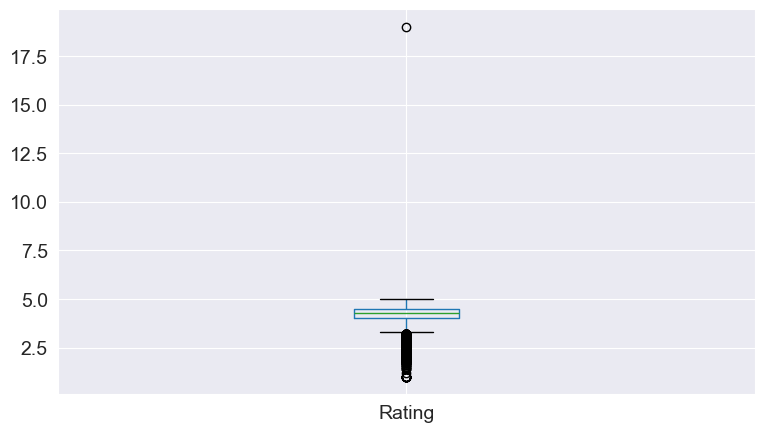

In [78]:
# Creating a boxplot to identify possible outliers
df.boxplot(column='Rating')
plt.show()

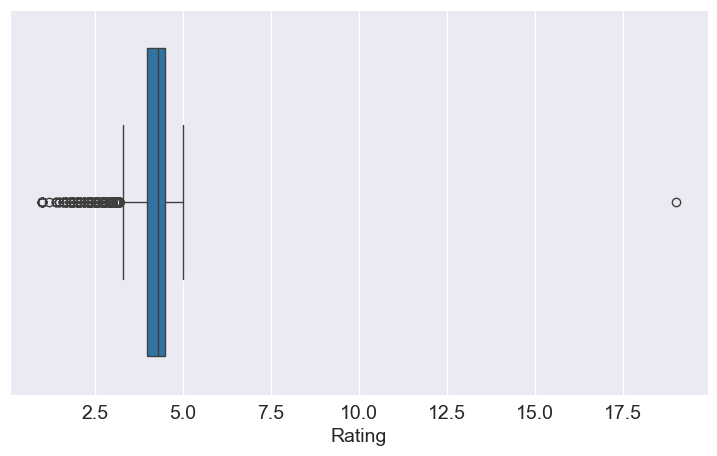

In [79]:
sns.boxplot(x='Rating', data=df)
plt.show()

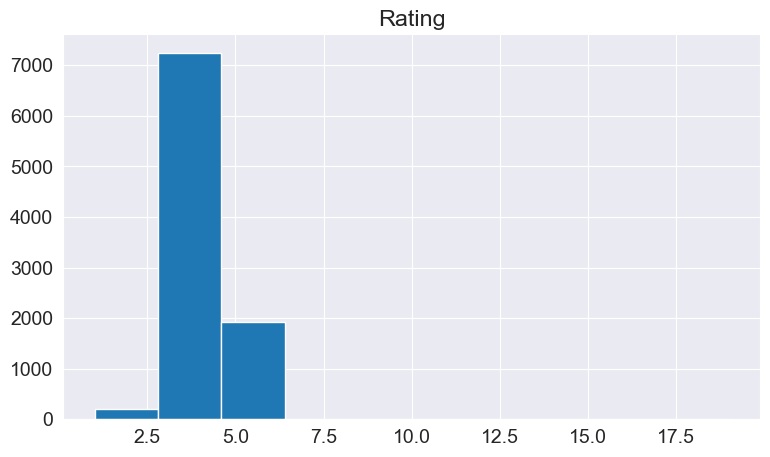

In [80]:
# Creating a histogram to cross check for the same
df.hist(column='Rating')
plt.show()

### **Data cleaning and preparation**

In [81]:
# Getting information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [82]:
# Checking for null values
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
# Checking for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [84]:
# Cheking how many outliers are present
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


In [85]:
# Droping the outliers we found
df.drop([10472], inplace=True)     
'''When inplace=False or omitted (default behavior):
The drop() operation returns a new DataFrame with the operation applied.
The original DataFrame df remains unchanged.'''

'When inplace=False or omitted (default behavior):\nThe drop() operation returns a new DataFrame with the operation applied.\nThe original DataFrame df remains unchanged.'

In [86]:
# Checking the dataset for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [87]:
# Checking if the outliers has been successfully or not
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4.0M,10000.0,Free,0.0,Everyone,Communication,10-02-2017,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404k,100000.0,Free,0.0,Everyone,Personalization,05-08-2014,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1M,10000000.0,Free,0.0,Everyone,Tools,07-08-2018,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14M,1000.0,Free,0.0,Everyone,Communication,21-11-2014,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2.6M,50000.0,Free,0.0,Everyone,Tools,17-05-2017,0.0.9,2.3 and up


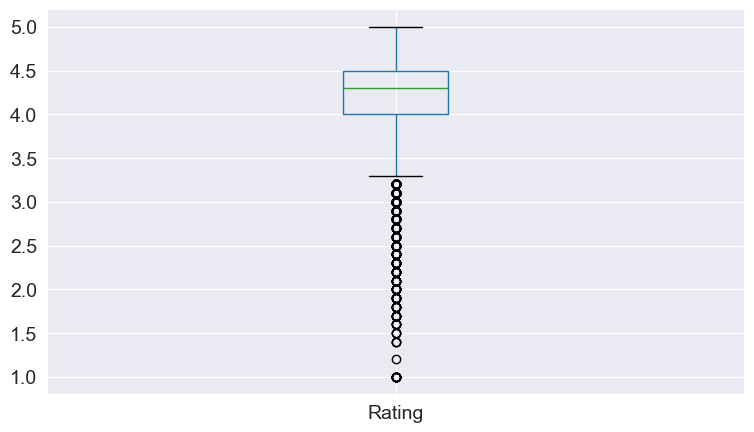

In [88]:
# Reconfirming to check any other outlier
df.boxplot(column='Rating')
plt.show()

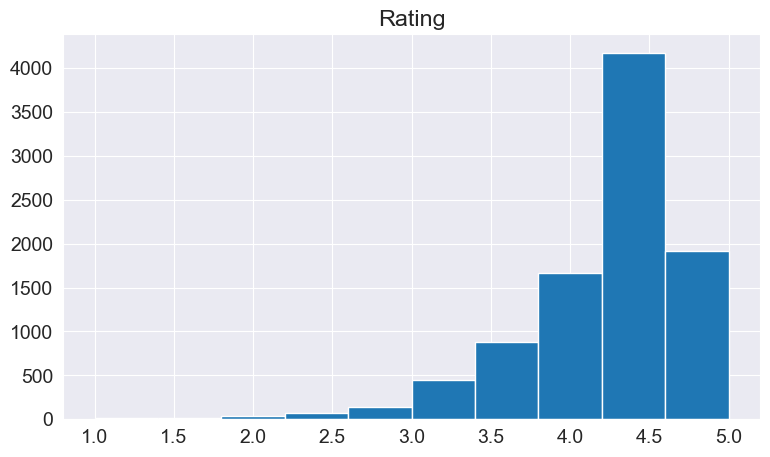

In [89]:
# Cross checking again for the same
df.hist(column='Rating')
plt.show()

In [90]:
# Dropping column irrelevant to analysis
df.drop(['Current Ver','Android Ver'], axis=1, inplace=True)

In [91]:
#Finding the null values in column 'Type'
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0.0,NaN,0.0,Everyone 10+,Strategy,28-06-2018


In [92]:
#Filling the missing value with 'Free' where price is 0.0
df['Type'].fillna("Free", inplace=True)

In [93]:
# Checking again for null values in the Dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [94]:
# Replacing the null values in 'Rating' with the mode value of that entire column since there are huge number(1474) of null values
modeValueRating = df['Rating'].mode()

In [95]:
# Replacing the null values in 'Rating' with the Mode Value of Rating Found above
df.fillna({'Rating': modeValueRating[0]}, inplace=True)

In [96]:
# Checking for null values to see if any more null values are present in the Dataset
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [97]:
# Removing the special characters and changing the data type of 'Size' column

# Removing the + symbol
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

In [98]:
# Removing the , symbol
df['Size'] = df.Size.apply(lambda x: x.replace(',' , ''))

In [99]:
# Removing the 'M' symbol and multipyling the value with 1000000
df['Size'] = df.Size.apply(lambda x: x.replace('M' , 'e+6'))

In [100]:
# Removing the 'K' symbol and multiplying the value with 1000
df['Size'] = df.Size.apply(lambda x: x.replace('k' , 'e+3'))

In [101]:
# Replacing the 'Varies with device' values with Nan
df['Size'] = df.Size.replace('Varies with device' , np.NaN)

In [102]:
# Checking for null values in the Dataset
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [103]:
# Dropping null values in 'Size'
df.dropna(subset = ['Size'], inplace = True)

In [104]:
# Checking if the null values in 'Size' are dropped correctly and any other null values present in the Dataset
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [105]:
# Converting the data type of 'Size' from object to numeric
df['Size'] = pd.to_numeric(df['Size'])

In [106]:
# Getting information on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9145 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   float64
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   float64
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
dtypes: float64(5), object(6)
memory usage: 857.3+ KB


In [107]:
# Changing the data type of 'Reviews' and 'Installs' from float to int
df = df.astype({"Reviews": int, "Installs": int})

In [108]:
# Getting information on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9145 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int32  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int32  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
dtypes: float64(3), int32(2), object(6)
memory usage: 785.9+ KB


In [109]:
#Printing unique values in 'Category'
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [110]:
#Storing the duplicate values in 'duplicates'
duplicates = df[df.duplicated(['App'])]

In [111]:
#Print duplicate apps
print(duplicates)

                                      App       Category  Rating  Reviews  \
256                   ZOOM Cloud Meetings       BUSINESS     4.4    31614   
266                              Zenefits       BUSINESS     4.2      296   
267                            Google Ads       BUSINESS     4.3    29313   
270                    FreshBooks Classic       BUSINESS     4.1     1802   
271                         Insightly CRM       BUSINESS     3.8     1383   
...                                   ...            ...     ...      ...   
10715                  FarmersOnly Dating         DATING     3.0     1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4    36981   
10730                         FP Notebook        MEDICAL     4.5      410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5    33599   
10768                                AAFP        MEDICAL     3.8       63   

             Size  Installs  Type  Price Content Rating         Genres  \
2

In [112]:
# Removing the duplicate values
df.drop_duplicates(keep=False, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,07-01-2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-01-2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,01-08-2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,08-06-2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-06-2018
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business,29-09-2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,25-07-2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,06-07-2018
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-01-2017


In [113]:
#Getting information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8556 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8556 non-null   object 
 1   Category        8556 non-null   object 
 2   Rating          8556 non-null   float64
 3   Reviews         8556 non-null   int32  
 4   Size            8556 non-null   float64
 5   Installs        8556 non-null   int32  
 6   Type            8556 non-null   object 
 7   Price           8556 non-null   float64
 8   Content Rating  8556 non-null   object 
 9   Genres          8556 non-null   object 
 10  Last Updated    8556 non-null   object 
dtypes: float64(3), int32(2), object(6)
memory usage: 735.3+ KB


In [114]:
# Checking unique values in column 'App'
print(df['App'].unique())

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'Parkinson Exercices FR'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


In [115]:
# Checking for Unique values in 'Price'
print(df['Price'].unique())

[  0.     6.99   1.49   2.99   3.99   7.99   5.99   4.99   1.99   9.99
   0.99   1.     3.49  10.99   7.49   1.5   14.99  15.99  74.99  39.99
  29.99   4.49   1.7    2.     3.88  25.99 399.99  17.99 400.     2.49
   3.02   1.76   4.84   4.77   1.61  19.99   1.59   6.49   1.29   5.
  13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49   1.75  14.
   4.85  46.99 109.99 154.99   3.08   2.59   4.8    8.99   1.96  19.4
  15.46  10.     5.49   3.04  12.99   4.29   2.6    3.28   4.6   28.99
   2.9    1.97  24.99 200.    89.99   2.56  30.99   3.61 394.99   1.26
  16.99   1.2    1.04]


In [116]:
# Checking for Unique values in 'Rating'
print(df['Rating'].unique())

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  2.5 1.  1.9 2.9 2.8 2.3 2.2 1.7 2.  1.8 2.7 2.4 1.6 2.1
 1.4 1.5 1.2]


In [117]:
# Checking for Unique values in 'Reviews'
print(df['Reviews'].unique())

[   159    967  87510 ...    603   1195 398307]


In [118]:
# Checking for Unique values in 'Size'
print(df['Size'].unique())

[1.90e+07 1.40e+07 8.70e+06 2.50e+07 2.80e+06 5.60e+06 2.90e+07 3.30e+07
 3.10e+06 2.80e+07 1.20e+07 2.00e+07 2.10e+07 3.70e+07 2.70e+06 5.50e+06
 1.70e+07 3.90e+07 3.10e+07 4.20e+06 7.00e+06 2.30e+07 6.00e+06 6.10e+06
 4.60e+06 9.20e+06 5.20e+06 1.10e+07 2.40e+07 9.40e+06 1.50e+07 1.00e+07
 1.20e+06 2.60e+07 8.00e+06 7.90e+06 5.60e+07 5.70e+07 3.50e+07 5.40e+07
 2.01e+05 3.60e+06 5.70e+06 8.60e+06 2.40e+06 2.70e+07 2.50e+06 1.60e+07
 3.40e+06 8.90e+06 3.90e+06 2.90e+06 3.80e+07 3.20e+07 5.40e+06 1.80e+07
 1.10e+06 2.20e+06 4.50e+06 9.80e+06 5.20e+07 9.00e+06 6.70e+06 3.00e+07
 2.60e+06 7.10e+06 3.70e+06 2.20e+07 7.40e+06 6.40e+06 3.20e+06 8.20e+06
 9.90e+06 4.90e+06 9.50e+06 5.00e+06 5.90e+06 1.30e+07 7.30e+07 6.80e+06
 3.50e+06 4.00e+06 2.30e+06 7.20e+06 2.10e+06 4.20e+07 7.30e+06 9.10e+06
 5.50e+07 2.30e+04 6.50e+06 1.50e+06 7.50e+06 4.60e+07 8.30e+06 4.30e+06
 4.70e+06 3.30e+06 4.00e+07 7.80e+06 8.80e+06 6.60e+06 5.10e+06 6.10e+07
 6.60e+07 7.90e+04 8.40e+06 1.18e+05 4.40e+07 6.95e

In [119]:
# Checking for Unique values in 'Type'
print(df['Type'].unique())

['Free' 'Paid']


In [120]:
# Checking for Unique values in 'Installs'
print(df['Installs'].unique())

[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000       1000  500000000
         50        100        500         10          1          5
 1000000000          0]


In [121]:
# Exporting the cleaned Dataset to a csv for further Analysis and Visualisation in MySQL and PowerBI
df.to_csv("cleaned_google_play_store_apps")

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [122]:
# Importing necessary libraries and packages
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Setting default style and parameters for the Visualisations
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [123]:
# Creating barplot showing Top Categories on Google Playstore
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

Text(0.5, 1.0, 'Top categories on Google Playstore')

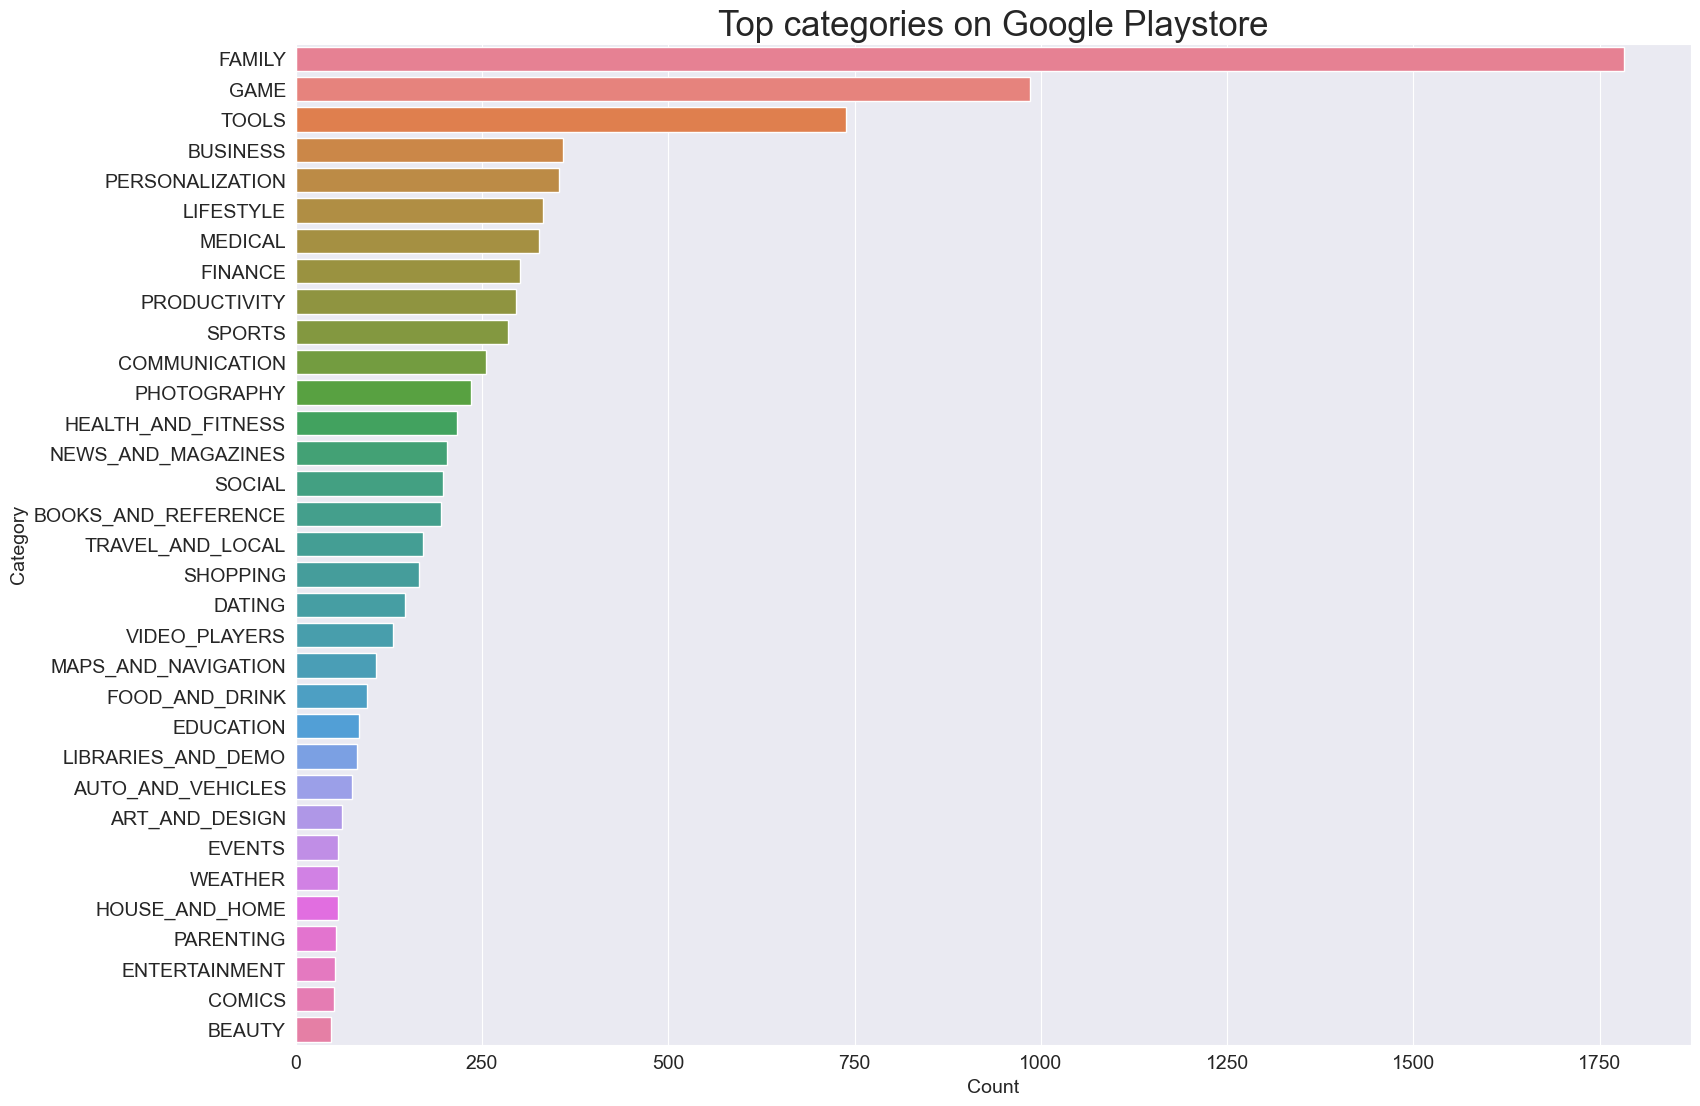

In [124]:
# Creating Bar Plot showing Top Categories on Google Playstore
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25)

> **From the graph, we conclude that 'Family' is the category with the highest number of applications on Play Store.**

In [125]:
# Creating Bar Graph showing Content Rating by App Count
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

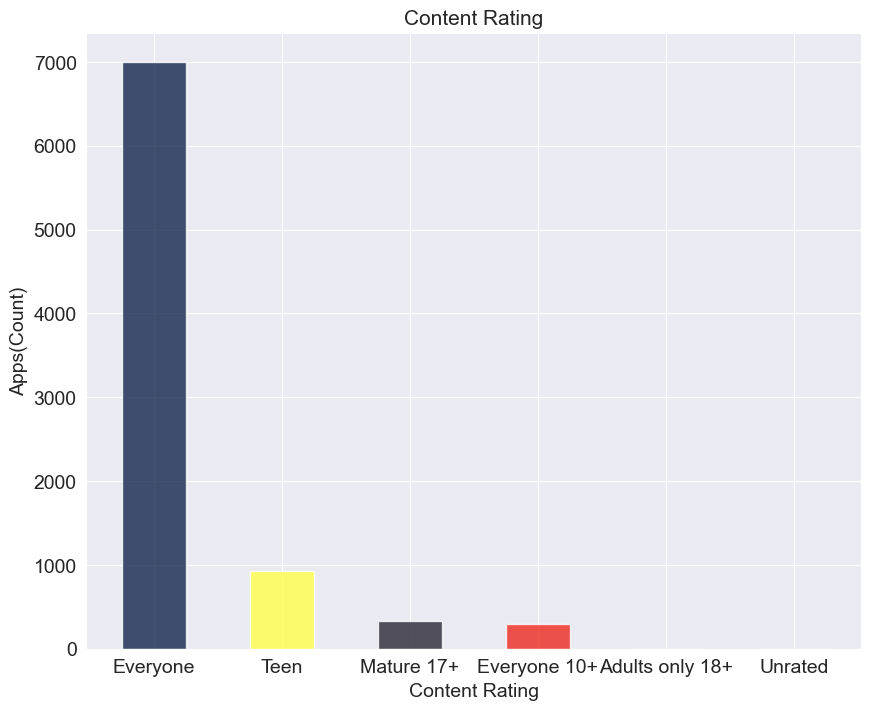

In [126]:
# Creating Bar Graph showing Content Rating by App Count
plt.figure(figsize=(10,8))
plt.bar(x2sis,y2sis,width=0.5,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 15);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

>**Here, we see that most apps on the Play Store are rated for 'Everyone' followed by 'Teen'.**

Average app rating =  4.206720430107526


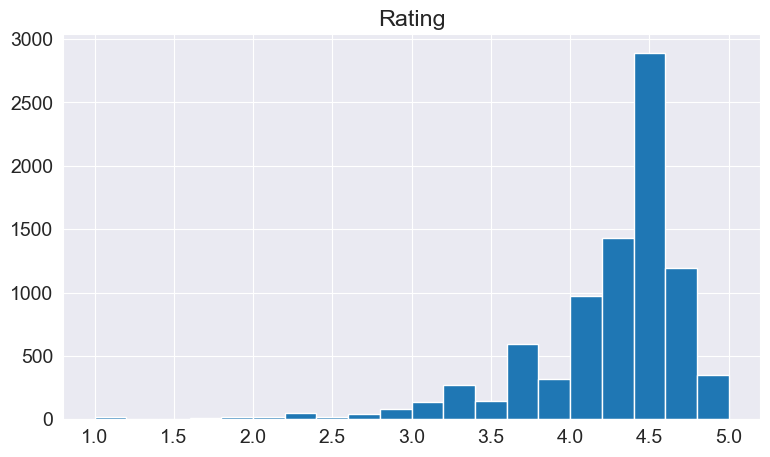

In [127]:
# Average rating of apps
avg_app_rating =df['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Creating Histogram showing Rating
df.hist(column='Rating', bins=20);

>**From the above Histogram, we can infer that the majority of the ratings fall between 4 to 4.75. The average rating of an app on the Google Playstore is 4.20.**

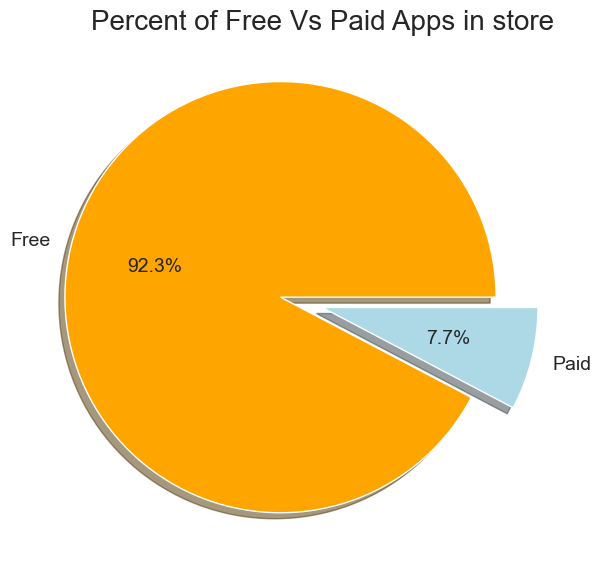

In [128]:
# Creating Pie Chart showing Percent of Free vs Paid Apps in the PlayStore
plt.figure(figsize=(7,7))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["orange","lightblue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

> **There are 92.3% of Free apps in majority and only 7.7% of Paid apps hosted on the Playstore.**

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

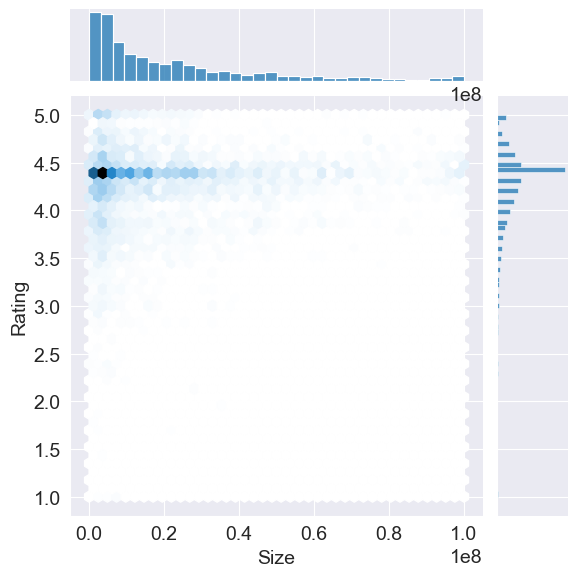

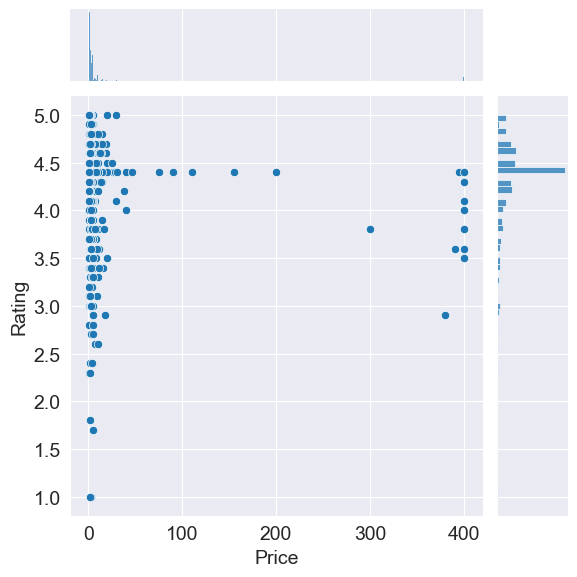

In [141]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = df.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = df[df['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,?? I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


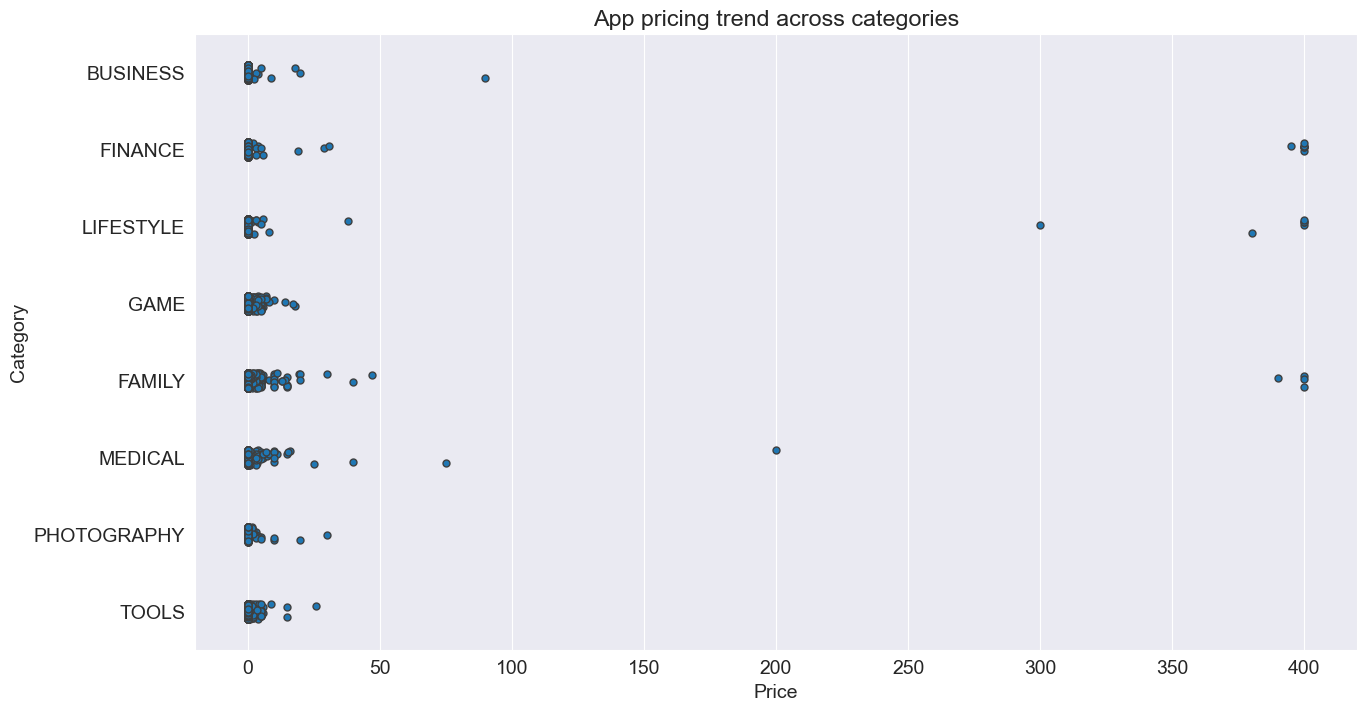

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

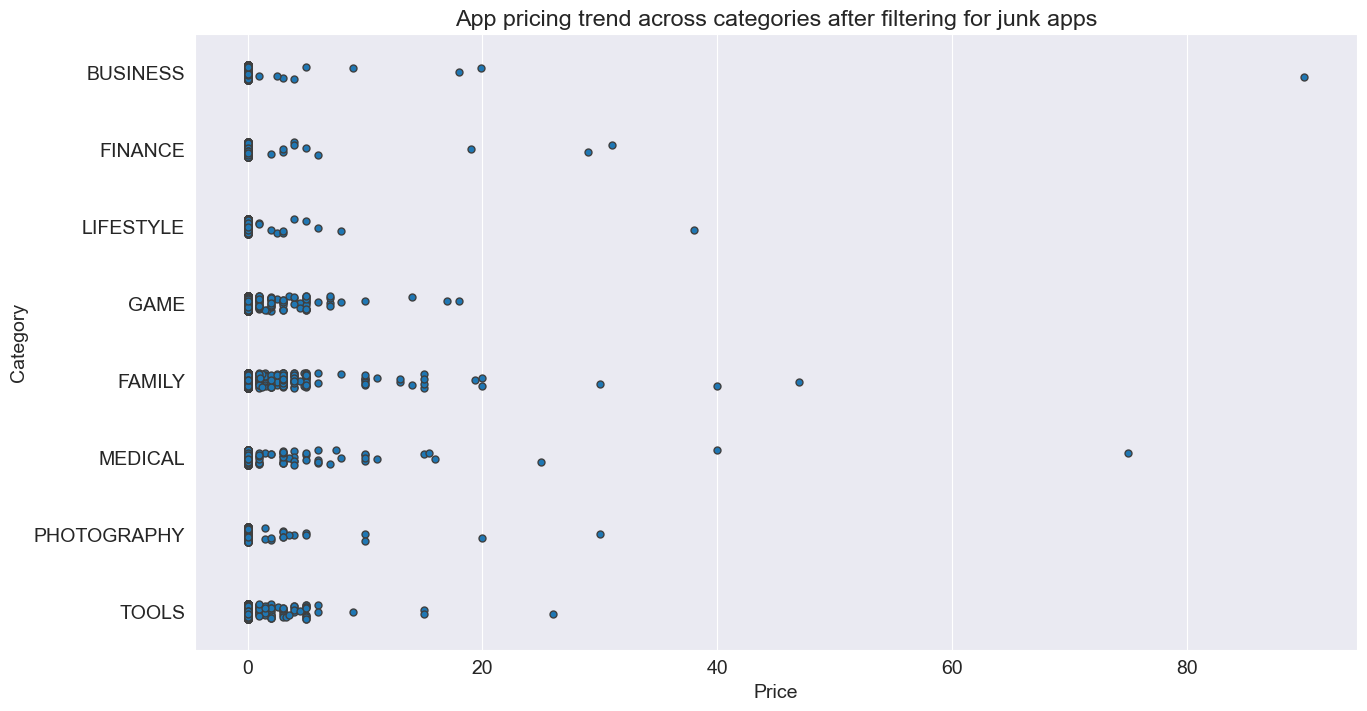

In [144]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

- ## **Sentiment Analysis**

In [ ]:
# Readind the csv file as df2
df2 = pd.read_csv('playstore_reviews.csv')

In [ ]:
# Dispay Top 5 rows of Dataset
df2.head()

,App,Translated_Review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,NaN
3,10 Best Foods for You,Works great especially going grocery store
4,10 Best Foods for You,Best idea us


In [ ]:
print(df2.columns)

Index(['App', 'Translated_Review'], dtype='object')


In [ ]:
print(df2.columns)

Index(['App', 'Translated_Review'], dtype='object')


In [ ]:
# Getting information on the Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App                64295 non-null  object
 1   Translated_Review  37427 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


In [ ]:
# Checking for null values in the Dataset
df2.isnull().sum()

App                      0
Translated_Review    26868
dtype: int64

In [ ]:
# Finding the null values in column "Translated_Review"
df2[df2.Translated_Review.isnull()]

,App,Translated_Review
2,10 Best Foods for You,NaN
7,10 Best Foods for You,NaN
15,10 Best Foods for You,NaN
102,10 Best Foods for You,NaN
107,10 Best Foods for You,NaN
...,...,...
64290,Houzz Interior Design Ideas,NaN
64291,Houzz Interior Design Ideas,NaN
64292,Houzz Interior Design Ideas,NaN
64293,Houzz Interior Design Ideas,NaN


In [ ]:
# Dropping the null values in the column Translated Review
df2.dropna(subset = ['Translated_Review'], inplace = True)

In [ ]:
# Checking for null values in the Dataset
df2.isnull().sum()

App                  0
Translated_Review    0
dtype: int64

In [ ]:
# Creating Polarity and Subjectivity Columns and finding out the same using TextBlob
df2['polarity'] =df2['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['subjectivity'] =df2['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
# Displaying Top 5 rows of Dataset
df2.head()

,App,Translated_Review,polarity,subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,0.40,0.875000
4,10 Best Foods for You,Best idea us,1.00,0.300000
5,10 Best Foods for You,Best way,1.00,0.300000


In [ ]:
# This function takes a polarity score as input and returns a sentiment label 
# based on the polarity score. If the polarity score is greater than 0, the 
# sentiment label is "positive". If the polarity score is equal to 0, the 
# sentiment label is "neutral". Otherwise, the sentiment label is "negative".
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Creating Sentiment Column to store the sentiment value found above for each Translated Review 'Positive', 'Neutral', 'Negative'
df2['sentiment'] = df2['polarity'].apply(lambda x: classify_sentiment(x))

In [ ]:
# Displaying Top 5 rows of Dataset
df2.head()

,App,Translated_Review,polarity,subjectivity,sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1.00,0.533333,positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,0.25,0.288462,positive
3,10 Best Foods for You,Works great especially going grocery store,0.40,0.875000,positive
4,10 Best Foods for You,Best idea us,1.00,0.300000,positive
5,10 Best Foods for You,Best way,1.00,0.300000,positive


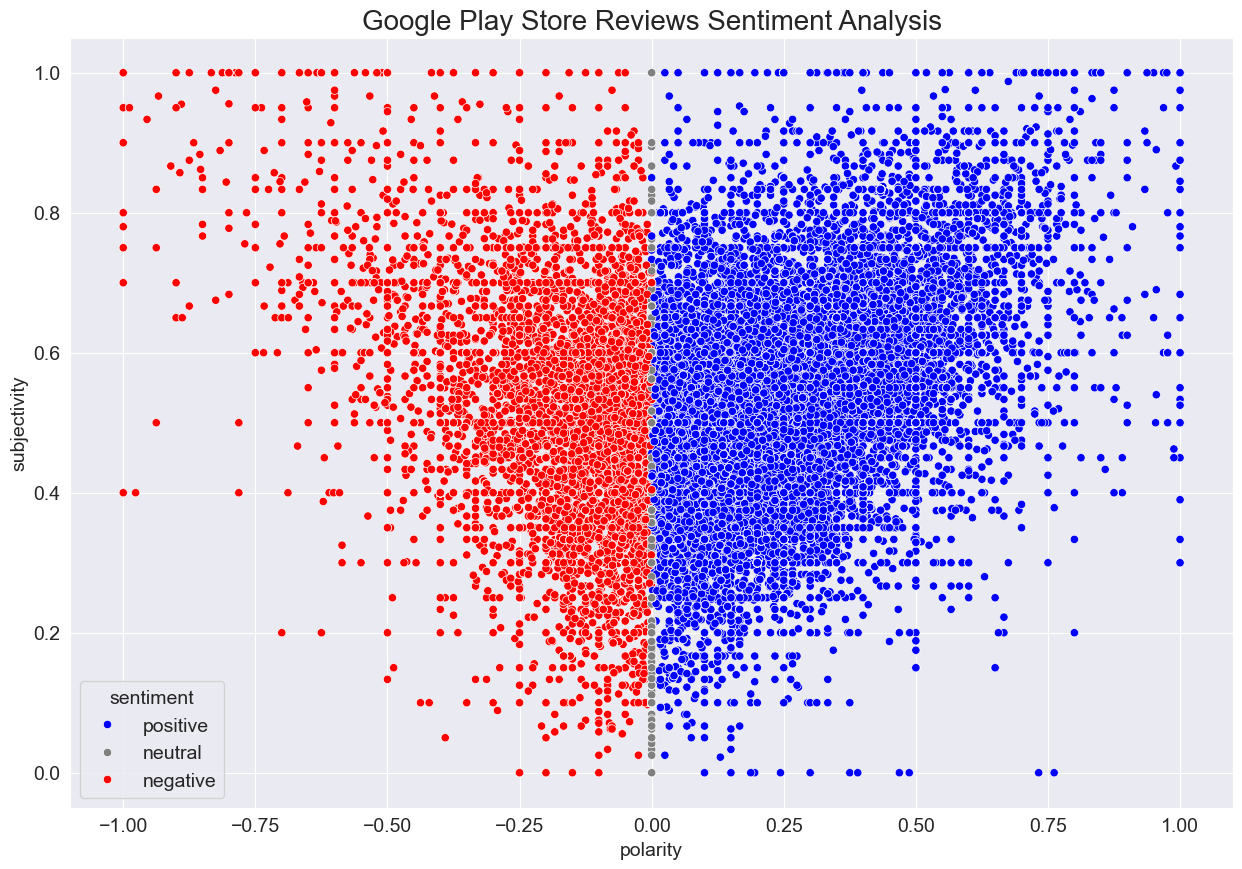

In [ ]:
# Creating Scatter Plot showing Positive, Neutral and Negative Sentiment Datapoints based on Subjectivity and Polarity
# %%capture --no-display
plt.figure(figsize=(15, 10))
newcolour = {'positive': 'blue', 'neutral': 'gray', 'negative': 'red'}
sns.scatterplot(x='polarity', y='subjectivity', data=df2, hue='sentiment', palette=newcolour)
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

>**From the above scatter plot, it can be concluded that sentiment subjectivity is directly proportional to sentiment polarity in maximum reviews. The inverted pyramid nature of the graph shows this behaviour. 
More positive/ negative reviews usually depict more personal opinion.**

In [127]:
# Exporting the cleaned Dataset to a csv for further Analysis and Visualisation in MySQL and PowerBI
df2.to_csv("cleaned_google_play_store_reviews")